# Исследование объявлений о продаже квартир

Цель проекта - определить, как различные факторы (площадь, высота потолков, удаленность от центра) влияют на рыночную стоитмость квартиры. В работе используются данные, введенные непосредственно пользователем и полученные автоматически на основании картографических данных. Анализ производится на основании исторических данных за несколько лет. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')#открываем файл
print('Общая информация о датафрейме')
print(real_estate_data.info())#выводим общую информацию о данных
print('Просмотрим 3 строки, где значение floors_total = None. Нужны только столбцы floors_total и floor') 
print(real_estate_data[['floors_total','floor']].query('floors_total.isnull() == True').head(3)) #выводим первые 3 строки с нулевым значением floors total: нужны толь столбцы [floors_total,floor]

print('Просмотрим первые 7 строк, где значение days_exposition = None. Нужны только столбцы first_day_exposition и days_exposition') 
print(real_estate_data[['first_day_exposition','days_exposition']].query('days_exposition.isnull() == True').head(7))#выводим то, что предполагалось ранее
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'],format = '%Y-%m-%d') #конвертируем тип данных в столбце first_day_exposition на тип datetime
print('Самая ранняя дата размещения, где значение days_exposition = None: {}'.format(real_estate_data[['first_day_exposition','days_exposition']].query('days_exposition.isnull() == True')['first_day_exposition'].min()))
print('Самая поздняя дата размещения, где значение days_exposition = None: {}'.format(real_estate_data[['first_day_exposition','days_exposition']].query('days_exposition.isnull() == True')['first_day_exposition'].max()))

#посчитем количество пропусков в таблице:
missing_values_report = real_estate_data.isna().sum().to_frame() #создадим датафрейм, в котором для каждого столбца исходной таблицы(датафрейма) будем хранить количество пропущенных значений
missing_values_report = missing_values_report.rename(columns = {0: 'missing_values'}) #переименуем столбцы для удобства работы с ними
missing_values_report['% of total'] = (missing_values_report['missing_values'] / real_estate_data.shape[0]).round(2) #посчитаем дол пропущенных значений в каждм столбце
print()
print('Количество и доля пропусков в каждом столбце:')
print(missing_values_report.sort_values(by = 'missing_values', ascending = False)) #выведем отсротированные по убыванию значения
print()
#real_estate_data.query('locality_name == "посёлок Мурино"').head(15) #выведем ервые 15 строк таблицы для наглядности
real_estate_data.head(15) #выведем ервые 15 строк таблицы для наглядности



Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 no

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## Вывод по первичному анализу данных

Согласно первичному анализу данных можно увидеть следующее:
 1. Пропущено достаточно большое количество значений(более 9000!!!, доля пропущенных значений - 39%) в столбце ceiling_height: не везде указана высота потолка. Причина, по которой эти данные отстутствуют, нам неизвестна и мы не можем достоверно знать (данные просто не указаны или была какая-то проблема с выгрузкой), на что их можно заменить. Соответственно, о пропусках в этих данных необходимо сообщить в отдел разработки с целью проверки отсутсвия ошибок. Заменить мы их ничем не можем, так что пока оставим их неизменными 
 2.В таблице есть относительно небольшое количество пропусков в столбце floors_total. Выведем первые 15 строк отсортированной таблицы: можно было бы предположить, что это одноэтажные здания: однако, посмотрев результат, можно видеть, что значение в столбце floor всегда разное, то есть заменить эти значения однозначно невозможно, но для удобства расчетов в дальнейшем можно заменить пропущенные значения нулями О пропущенных значениях необходимо также сообщить в отдел разработки.
 3. Есть 1903 пропущенных значений в строке living_area, а также 2278 в столбце kitchen_area. Эти данные мы не можем заменить значением по умолчанию: это категориальные данные, значения в которых строго индивидуальны. Об этих пропусках можно также сообщить в отдел разработки
 4. В столбце is_apartment пропущены практически все значения (88% !!!): есть предположение, что просто пользователи, чья недвижимость не является апартаментами, часто игнорируют это поле, в таком случае можно заменить пропущенные значения на false. 
 5.Около половины значений в столбце balcony пропущено: можно предположить, что они пропущены там, где балконов нет: можно заменить значением 0
 6.Пропущено 49 значений в столбце locality_name: скорее всего, это связано с какой-то ошибкой: сложно продать квартиру неизвестно где. Заменить эти значения тоже очень сложно каким-то значением по умолчанию: только аналогом Nan, соответственно, заменять не будем. Об этом также необходимо сообщить в отдел разработки
 7. В столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 пропущено приблизительно одинаковое количество значений: скорее всего, пользователи просто не хотели указывать эти данные, хотя, возможно, есть еще причины. в любом случае, заменить  данные эти можно только зная фактический адрес объекта продажи и его расстояние до соответствующих точек. Данной информацией мы не обладаем, так что заменить мы не можем. 
 8.В столбцах parks_nearest, ponds_nearest пропущено очень большое количество значений, намного больше, чем в parks_around3000, ponds_around3000. Скорее всего, если поблизости не было парков и прудов, но они были в радиусе 3000, то пользователи просто не указывали первый параметр, а указывали только второй. Исходя из этого, можно заменить значения Nan нулем в столбцах parks_neares, ponds_nearest там, где указаны значения parks_around3000, ponds_around3000.
 9.В столбце days_exposition пропущено порядка 3000 значений: можно было бы предположить, что эти объекты недвижимости до сих пор продаются. Однако, выведя 7 строк таблицы (возьем для наглядности только столбцы first_day_exposition и days_exposition) можно видеть, что некоторые объявления были опубликованы очень давно (даже если предположить, что сейчас я нас2019 год, то дата публикации - январь 2017 - это слишком давно для таких объявлений). Для того, чтобы более точно понимать ситуацию с датами размещения, можно узнать наиболее раннюю дату размещения объявления, наиболее позднюю. Для этого можно сразу преобразовать тип данных столбца first_day_exposition: сейчас он строковый, преобразуем его в тип dstetime. В проводимом нами анализе данных время размещения нас не интересует - только дата, соответственно, оставим только ее.
 Как можно видеть, наиболее раннее объявление, для которого days_exposition == None, датируется еще 2014 годом. Крайне маловероятно, что объявление о продаже просто висит (и не продается, не снимается) 5 лет: скорее всего, про объявление просто забыли (продали с помощью другого ресурса, например, или произошла какая-то ошибка). В любом случае, нет никаких оснований полагать, что для всех таких объявлений можно как-то заменить это значение. Скорее всего, все причины разные, как и даты реальной продажи этих объектов недвижимости. Поэтому наиболее правильно оставить эти значения как есть.

### Шаг 2. Предобработка данных

In [3]:
def change_parks_nearest(row): #функция, с помощью котрой будем зменять пропущенные значения в parks_nearest и ponds_nearest,там, где parks_around300 и ponds_around300 определены
    try: #так как мы планируем использовать функцию только для 2 наборов столбцов, очень удобно воспользоваться конструкцией try-except: если не подошел один набор, подойдет 2
        #определяем переменные
        parks_nearest = row['parks_nearest'] 
        parks_around300 = row['parks_around3000']      
    except:
        ponds_nearest = row['ponds_nearest']
        ponds_around300 = row['ponds_around3000']
    result = parks_nearest #переменная, которая возвращает результат, изначально равна parks_nearest. Если будут условия для ее изменения, то она будет изменена. Иначе останется прежней
    if not(parks_nearest >= 0) and parks_around300 >= 0: #если значение parks_nearest не определено и при этом определено значение parks_around300
        result = 0 #переменная реузультата равна 0
    return result

## Для начала преобразуем типы данных:
real_estate_data['last_price'] = real_estate_data['last_price'].astype('int') # в нашем анализе нас не интересуют копейки в цене, так что логично для удобства преобразовать в тип int
#print('количество строк с is_apartment = true до преобразования: {}'.format(real_estate_data.loc[real_estate_data['is_apartment'] == True, 'is_apartment'].count()))
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(False).astype('bool') # является ли квартира апартаментами - либо истина, либо ложь. Преобразуем к булеву типу данных
#print('количество строк с is_apartment = true после преобразования: {}'.format(real_estate_data.loc[real_estate_data['is_apartment'] == True, 'is_apartment'].count())) # Посчитаем для контроля количество строк с is_apartment = True
real_estate_data['floors_total'] = real_estate_data['floors_total'].fillna(0).astype('int') # количество этажей в доме всегда целочисленно => преобразуем тип данных
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0).astype('int') #количество балконов всегда целочисленно => преобразуем тип данных в int
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].fillna(0).astype('int') #заменяем тип данных days_exposition

#print(real_estate_data[['ponds_nearest','ponds_around3000']].head(10))
print()
real_estate_data['parks_nearest'] = real_estate_data.apply(change_parks_nearest,axis = 1) #заполняем нулями те пропущенные значения в столбце parks_nearest, где в той же строке существует ненулевое значение parks_around3000
real_estate_data['ponds_nearest'] = real_estate_data.apply(change_parks_nearest,axis = 1) #заполняем нулями те пропущенные значения в столбце ponds_nearest, где в той же строке существует ненулевое значение ponds_around3000

#print(real_estate_data['locality_name'].unique()


real_estate_data.info() #выведем общую информацию о таблице после преобразования
#Обработаем колонку locality_name
print()

print('уникальные значения в столбце locality_name после обработки')
real_estate_data['locality_name'] = real_estate_data['locality_name'].str.lower() #приведем все к едному регистру
real_estate_data['locality_name'] = real_estate_data['locality_name'].str.replace('ё','е') #избавимся от буквы ё
print(real_estate_data['locality_name'].unique())
#real_estate_data[['last_price','total_area','locality_name']].head(5)
print()
print('Количество дубликатов: {}'.format(real_estate_data.duplicated().sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           18181 non-null float64
ponds_around

## Вывод:

Как и было определено в предыдущем пункте, осуществлена замена типов данных:
1. В столбце last_price тип данных преобразован в целочисленный: в нашем анализе нас не интересуют копейки, они не ирают никакой роли, однако для удобства расчетов и представления лучше, если тип данных сразу станет целочисленным
2. Осуществлена замена типа данных is_apartment на bool. По сути, данные в этом столбце итак представлены в данном типе, однако сеществует большое количество пропусков. Как и было решено ранее, они заменены значениями False
3. Количество этажей в доме также всегда целочисленно, преобразуем тип даннных floors_total в int. Для этого произведем замену пропущенных значений на значение по умолчанию - нули: условимся понимать, что они указаны там, где этажность неизвестна
4. Заполним пропущенные значения в столбце balcony нулями, как и было решено ранее. Преобразуем тип данных в целочисленный, так как количество балконов всегда целочисленно
5. Преобразуем тип данных days_exposition в целочисленный, заполнив пропуски нулями - условно будем понимать, что для таких строк количество дней размещения неизвестно.
6. В столбцах parks_nearest и pnds_nearest заменены пропущенные значения на нули в тех строках, где в столбцах parks_around3000, ponds_around3000 существуют ненулевые значения.
7. Обработаны значения в столбце locality_name: приведены к единому регистру и заменена буква ё на е. После чего выведены сортированные данные. Значения в столбце теперь выглядят корректно
8. Дубликатов в таблице не обнаружено
Выведена общая информация о таблице после всех преобразований

### Шаг 3. Посчитайте и добавьте в таблицу

In [4]:
def floor_type_func(row): #функция для определения типа этажа: первый, послежний, другой
    floor = row['floor'] #получаем данные из таблицы
    floors_total = row['floors_total'] 
    result = ''
    if floor == 1: #если floors = 1, то этаж первый 
        result = 'первый'
    elif floor == floors_total: #если floors = floors_total, то этаж - последний
        result = 'последний'
    elif floors_total > 0: #если указанное количество эатжей больше нуля (изначально были данные о количестве этажей), то значение "другое"
        result = 'другое'
    else:
        result = 'не определено' #если количество этажей изначально не было задано (отсутсвовало значение), то присвоим значение "не определено"
    return result

real_estate_data['m_sq_price'] = real_estate_data['last_price'] / real_estate_data['total_area']#посчитаем цену квадратного метра
real_estate_data['m_sq_price'] = real_estate_data['m_sq_price'].round(2) #округлим полученные данные до 2 знаков после запятой
real_estate_data['publication_weekday'] = real_estate_data['first_day_exposition'].dt.weekday #определим день недели, когда объявление было опубликовано
real_estate_data['publication_month'] = real_estate_data['first_day_exposition'].dt.month #определим месяц публикации объявления
real_estate_data['publication_year'] = real_estate_data['first_day_exposition'].dt.year # определим год публикации обхявления
real_estate_data['floor_type'] = real_estate_data.apply(floor_type_func,axis = 1) #применим функцию для определения типа эатжа. результат отобразм в колонке floor_type
real_estate_data['live_to_total_area'] = real_estate_data['living_area'] / real_estate_data['total_area'] #посчитаем соотношение жилой площади к общей
real_estate_data['live_to_total_area'] = real_estate_data['live_to_total_area'].round(3) #округлим результат до 3 знаков после запятой
real_estate_data['kitchen_to_total_area'] = real_estate_data['kitchen_area'] / real_estate_data['total_area'] #посчитаем соотношение площади кухни к общей площади
real_estate_data['kitchen_to_total_area'] = real_estate_data['kitchen_to_total_area'].round(3) #округлим результат до 3 знаков после запятой
real_estate_data.head(5) #выводим 5 строк для контроля результата

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_sq_price,publication_weekday,publication_month,publication_year,floor_type,live_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,482.0,0,120370.37,3,3,2019,другое,0.472,0.231
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,0.0,81,82920.79,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,90.0,558,92785.71,3,8,2015,другое,0.612,0.148
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,84.0,424,408176.10,4,7,2015,другое,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,112.0,121,100000.00,1,6,2018,другое,0.320,0.410


# Вывод шаг 3

Определены и посчитаны следующие значения:
1. m_sq_price: цен за квадратный метр. Результат округлен до 2 знаков после запятой
2. publication_weekday: день недели размещения объявления
3. publication_year: год размещения объявления
4. publication_minth: месяц размещения объявления
5. floor_type: тип этажа квартиры: первый, последний, другой
6. live_to_total_area: соотношение жилой и общей площади квартиры. Для удобства работы результат округлен до 3 знаков после запятой
7. kitchen_to_total_area: соотношение площади кухни и общей площади. Для удобства представления результат окргулен до 3 знаков после запяой. 
Ввиду того, что не для всех объявлений были указаны жилая площдь и площадь кухни, в столбцах live_to_total_area, kitchen_to_total_area также имеются пропущенные значения

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

# Анализ параметров: площадь, цена, число комнат, высота потолков

Описательная статистика для total_area : общая площадь
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
Количество различных значений в total_area: 2182


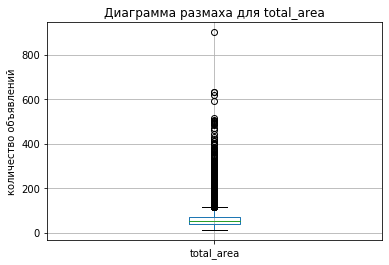

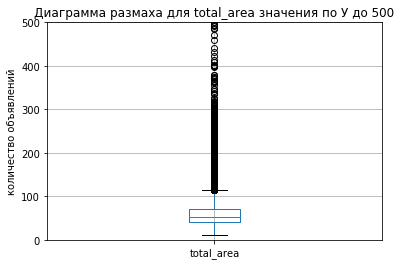

Гистограммы для total_area: общая площадь



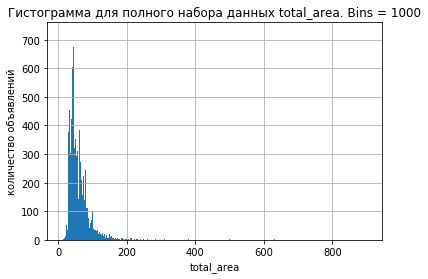

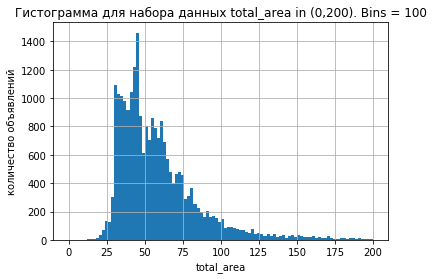

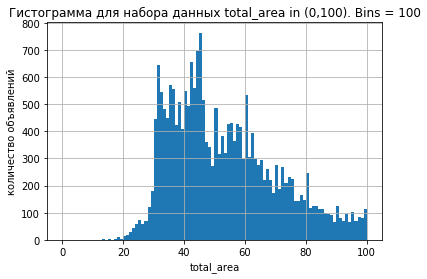


Описательная статистика для last_price : цена
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
Количество различных значений в last_price: 2978


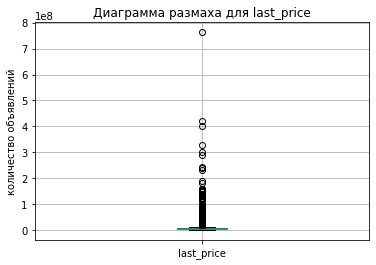

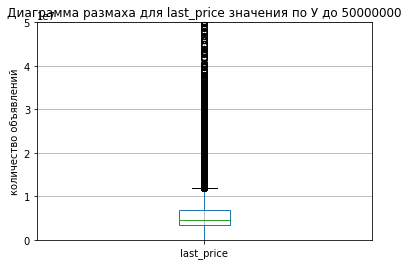

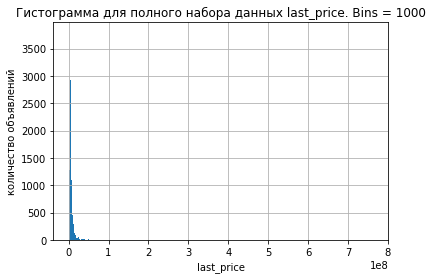

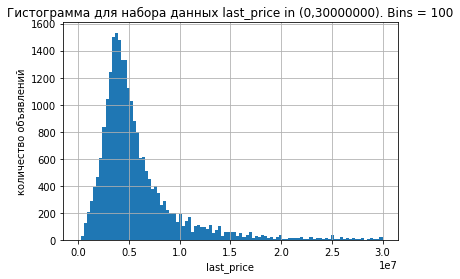

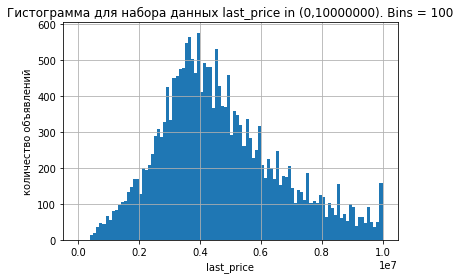


Описательная статистика для rooms : количество комнат
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
Количество различных значений в rooms: 17


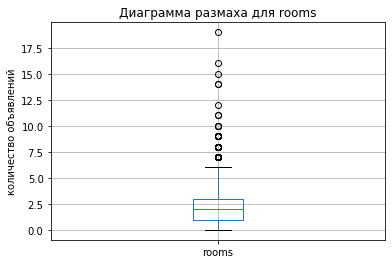

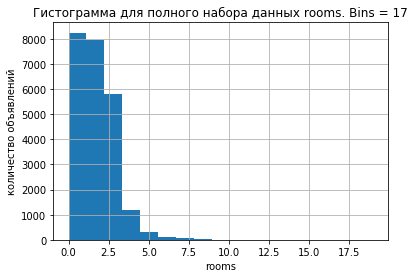


Описательная статистика для ceiling_height : высота потолка
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Количество различных значений в ceiling_height: 184


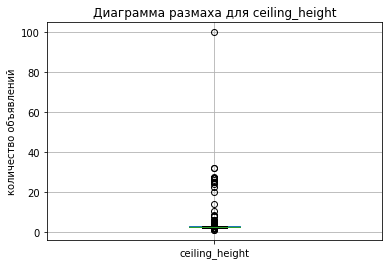

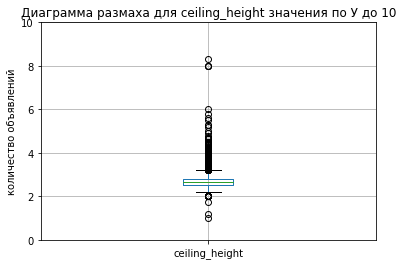

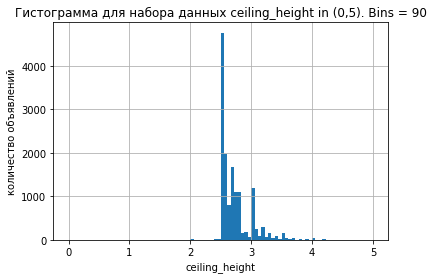

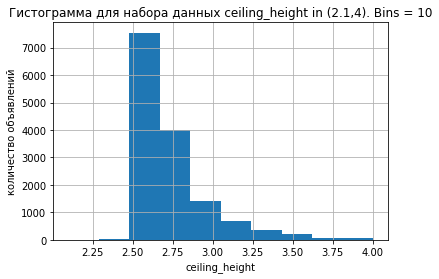

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment
22590,6000000,55.00,2018-10-31,2,1.00,12,32.4,7,False
5712,1500000,42.80,2017-08-14,2,1.20,2,27.5,1,False
16934,4100000,40.00,2017-10-17,1,1.75,37,17.4,5,False
22960,2300000,53.60,2018-10-18,2,2.00,2,19.0,1,False
552,2999000,33.50,2017-03-30,1,2.00,15,17.5,6,False
20520,3600000,38.00,2018-07-05,1,2.00,12,15.0,9,False
2572,2400000,62.00,2018-12-27,3,2.00,5,40.0,4,False
19329,1700000,40.00,2018-07-15,2,2.00,9,NaN,8,False
19098,2700000,56.00,2018-02-04,3,2.00,5,46.0,1,False
4212,2120000,35.43,2017-12-18,1,2.00,18,16.6,9,False


In [5]:


def print_statistic_info(column_name,lim_big_diagram): #функция печати статистической информациии диаграмм размаха
    print(real_estate_data[column_name].describe()) #выведем значения описательной статистики 
    print('Количество различных значений в '+column_name+': {}'.format(len(real_estate_data[column_name].unique()))) #посчитаем количество уникальных значений в столбце, чтобы лучше расчитать количество корзин для гистограммы
    real_estate_data.boxplot(column = column_name) #выводим диаграмму размаха
    plt.title('Диаграмма размаха для '+ column_name) #печать заголовка диаграммы
    plt.ylabel('количество объявлений') #именование оси Y
    plt.show() 
    if lim_big_diagram > 0: #если масштаб нужно изменить, печатаем диаграмму в новом масштабе
        real_estate_data.boxplot(column = column_name)
        plt.title('Диаграмма размаха для '+ column_name + ' значения по У до {}'.format(lim_big_diagram))
        plt.ylim(0,lim_big_diagram)
        plt.ylabel('количество объявлений')
        plt.show()
    


def print_hist(column_name, bins_number ,range_lower, range_higher): #функция печати гистограммы
    try:
        if  range_higher == 0: #если не заданы границы диапазона
            hist_1 = real_estate_data[column_name].hist(bins = bins_number) #постороим смую общую гистограмму 
            plt.title('Гистограмма для полного набора данных ' + column_name + '. Bins = {}'.format(bins_number)) #заголовок диаграммы
        else: #если границы диапазона задны
            hist_1 = real_estate_data[column_name].hist(bins = bins_number, range = (range_lower, range_higher)) #постороим смую общую гистограмму
            plt.title('Гистограмма для набора данных ' + column_name + ' in ({},{}). Bins = {}'.format(range_lower, range_higher,bins_number))
        plt.xlabel(column_name) #именование оси X
        plt.ylabel('количество объявлений') #именование оси Y
        plt.show()
   
    except:
        print('Что-то пошло не так')

# Рассмотрим основные параметры: площадь, цена,число комнат, высота потолков. Построим гистограммы для каждого
print('Описательная статистика для total_area : общая площадь')
print_statistic_info('total_area', 500)
print('Гистограммы для total_area: общая площадь')#Выведем гистограммы для total_area
print()
print_hist('total_area', 1000 ,0, 0)#строим гисторграммы
print_hist('total_area', 100 ,0, 200)
print_hist('total_area', 100 ,0, 100)

#boxplot  = real_estate_data.boxplot(column = 'total_area')

print()
print('Описательная статистика для last_price : цена')
print_statistic_info('last_price', 50000000)
print_hist('last_price', 1000 ,0, 0)
print_hist('last_price', 100 ,0, 30000000)
print_hist('last_price', 100 ,0, 10000000)


print()
print('Описательная статистика для rooms : количество комнат')
print_statistic_info('rooms', 0)
print_hist('rooms', 17 ,0, 0)

print()
print('Описательная статистика для ceiling_height : высота потолка') #здесь если убрать  Nan  и отбрость слишком большие значения, может что-то красивое получиться
print_statistic_info('ceiling_height', 10)

print_hist('ceiling_height', 90 ,0, 5)
print_hist('ceiling_height', 10 ,2.1, 4)
#Данные о высоте потолков вызвали сомнения, выведем некоторые из них для наглядности
real_estate_data_good_ceiling_height = real_estate_data.query('ceiling_height >= 2.1 and ceiling_height < 4') #создаем датафрейм, отобранный по правильным значениям ceiling_height
real_estate_data[['last_price', 'total_area','first_day_exposition','rooms','ceiling_height','floors_total','living_area','floor','is_apartment']].query('ceiling_height < 2.1 or ceiling_height > 5').sort_values(by = 'ceiling_height')
#real_estate_data[['last_price', 'total_area','first_day_exposition','rooms','ceiling_height','floors_total','living_area','floor','is_apartment']].query('ceiling_height > 4 and ceiling_height <= 5').sort_values(by = 'ceiling_height')

# Вывод по анализу параметров общая площадь, цена, количество комнат, высота потолка

    Рассмотрим описательную статистику и гистограммы для total_area:
   Из графиков гистограмм и значений описательной статистики можно видеть, что большая часть значений "сгруппирована" около медианного значения (52 кв.м.), однако нельзя сказать что их доля увеличивается или уменьшается равномерно. Встечается не очень большое количество объявлений для квартир площадью 12 кв.м. (это минимальное значение) до примерно 30 кв.м. Зато большая часть всех значений ниже медианы сгруппирована в интервале 30-52 кв.м, причем заметен очень большой пик в области 45-46 кв.м.: очевидно, такие объявления встречаются чаще всего. Также есть большой пик для квартир площдью 32-33 кв.м. Эти два пика характеризуют самые популярные объявления: очевидно, чаще всего продают именно небольшие квартиры. В самом деле, если посмотреть значения квартилей из описательной статистики, можно увидеть, что как раз 25% всех вобъявлений приходится на долю квартир плющадью 40 - 52 м.кв. Это также очень заметно на третьей укрупненной гистограмме. Для квартир, размер которых больше медианного значения, можно заметить более плавное уменьшение  количества объявлений в зависимости от площади квартир, однако также наблюдаются пики. Особенно высокий в районе 60 кв.м., также есть очень заметный в районе 80 кв.м. (достаточно популярные площади дл 2 и 3 комнатных квартир). Значение третьего квартиля - около 70 кв.м. То есть еще 25% объявлений для квартир от 52 до 70 кв.м.: на графике видно, что там очень много объявлений. Для квартир площадью выше 200 кв.м. встречается, в основном, 1-3 объявления  
    Таким образом, можно сделать вывод, что наибольшее количество объявлений приходится на квартиры площадью 40 - 70 кв.м., то есть, "средних" квартир,  самое большое количество - на квартиры площадью 45-46 кв.м., очень мало представлено объявлений для малентких квартир (до 30 кв.м.), но достаточно много квартир бизнес -  и премиум класса. (по площади). На гистограмме видно, что очень много квартир около 100 м.кв (больше 100), а также больше. Еще заметны небольшие всплески вплоть до плозади в 200 кв.м., однако, даже для квартир большей площади можно найти довольно много объъявлений: просто по 1-3 объявления на каждый вид квартиры, плоть до 900 кв.м. То есть можно сказать, что сегмент очень большой жил площади представлен намного объемнее, чем сегмент очень маленькой. 
    На диаграмме размаха очень хорошо видно, что верхняя граница статистически значимой выборки упирается в значение около 110 кв.м.: все, что выше уже действительно довольно редкие объявления (однако, до 500 м.кв еще довольно много точек, а вот после - уже действительно крайне редкие значения) ввиду особой элитности такого крупного жилья. Нижняя граница статистически значимой выборки упирается в минимальное значение
    
    Рассмотрим описательну статистику и гистограммы для last_price:
Общая гистограмма для last_price очень напоминает общую гистограмму для total_area: очень сильный пик вначале и потом достаточно резкое падение, при этом, после этого падения в last_price практически нет таких явных пиков. Это говорит о более нормальном распределении в границх статистически значимой выборки (согласно диаграмме размаха, верхняя ее граница - около 11 млн. рублей, нижняя - упирается в 0): то есть мы можем точно сказать, что взаимосвязь last_price и total_area существует, но площадь - далеко не единственный фактор в определении цены. Большая часть всех объявлений - в диапазоне 3.4 - 6.8 млн.руб,а медианное значение -4.65. млн. руб. На гистограмме мы также можем видеть, что самое большое количество объявлений как раз около 4 млн. рублей (пики) 

    Рассмотрим описательную статистику и гистограммы для rooms - количество комнат
На гистограмме можно видеть, что самое большое количество объявлений приходится на квартиры 0-1 комната (студии ), чуть меньше на двухкомнатные квартиры, еще меньше (но еще много - на трехкомнатные), и уже значительно меньше на 4 и 5 комнатные, а дальше - еще меньше (на диаграмме размаха можно видеть, что верхняя граница статистически значимой выборки ограничивается 6 комнатами), что неудивительно: это уже достаточно большое и дорогое жилье. Межквартильный размах так и находится в интервале 1-3, то есть 50% всех квартир, которые представлены 1,2, либо 3-комнатные, что неудивительно, потому как это наиболее популярные планировки и наиболее доступные. Также можно заметить некоторую взаимосвязь с графиком total_area. Для графика total_area очнь большие пики для квартир около 30 кв.м., а аж 25% всех квартир приходится на долю тех, чья площадь в интервале 40-52 кв.м. Это все описывает по большей части однокомнатные, и некоторое количество двухкомнатных квартир (по типичной площади). В интервал 52 - 70 кв.м. ткже попадают по большей части двухкомнатные и трехкомнатные (хотя многие трехкомнатные больше). Ранее была замечена схожесть между графиками last_price и total_area. Как замечено было ранее, площадь квартиры влияет на ее цену, а площадь квартиры чаще всего взаимосвязана с количеством комнат, то есть количество комнат аобслютно точно оказывает влияение на цену.

    Рассмотрим описательную статистику и гистограммы для ceiling_height - высота потолка.
Данные на гистограмме (она построена для интервала 0-5 метров) кажутся достаточно логичными: большая часть квартир имеет высоту потоклов 2.5-3.4 метра. Очень большой пик наблюдается для квартир с высотой потолков в 2.5 метра: довольно частое значение для типовых домов СССР. И по данным описательно статистики видно, что 50% недвижимости с высотой потолков 2,52-2.8 метра, среднее -2.77 метра, медиана -2.65. Однако, вызвали подозрения максимальное и минимальное значение - 1 и 100 метров. 
Согласно СНиП и ГОСТ высота потолка в жилом здании не может быть ниже 2.1 метра (и то не во всех помещениях). Соответственно, есть смысл убрать все значения с высотой потолков ниже указанного: это просто какая-то ошибка в данных
Высота потолка выше 3.5 метров в многоэтажном здании - тоже крайняя редкость, однако в стаорм фонде в довольно редких случаях бывает и выше 4. Высота потолка выше 5 метров - это уже либо ошибка в данных, либо просто какой-то артефакт. Соответственно,эти данные для дальнейшего анализа тоже можно исключить.
Согласно диаграмме размаха границы статистически значимой выборки ограничиваются значениями 2.1 - 3.2 метра: это действительно наиболее популярные значения для высоты потолка однако до 4 - 5 метров еще довольно много значений (и эти значения еще реальны), поэтому можно попробовать включить в анализ квартиры с высотой потолка до 4 метров
Для наглядности вывела часть таблицы, отсортированную по условиям: ceiling_height < 2.1 or ceiling_height > 5. Выведенные данные оказались очень интересны, и, возможно, не совсем корректны:
Строка 22590: кажется странным, что в двухкомнатной квартире на 7 этаже 12-ти этажного дома с достаточно немаленькой площадью (55 кв.м) высота потолка всего 1 метр. Такие дома не строят, это либо ошибка, либо артефакт. Также вызывает очень сильные сомнения высота потолка 1.20 и 1.75 (последнее в 37-этажном доме. Это что-то очень странное). Также кажется очень неправдоподобной высота потолка в 20 метров на 14 этаже 17-этажного здания(строка 17496). Также в привычную картину мира не вписывается, например, квартира-студия площадью 25 кв.м. на 17 этаже 25-этажного здания с высотой потолков в 27 метров (строка 4876). Скорее всего, в данных о высоте потолков содержится довольно большое количество ошибок. Об этом необходимо сообщить в отдел разработки. Некорректные значения из последующего анализа данных нужно будет убрать. Также в данных о высоте потолков почти 9000 пропусков   
 На основании этого создан датафрейм real_estate_data_good_ceiling_height, в котором будут сохранены все записи без выбросов и артефактов в столбце ceiling_height. Более укрупненная гисторгамма для real_estate_data_good_ceiling_height выглядит более правдоподбно и логично: в большей части объявлений высота потолков 2.4-2.7м., затем в каждом интервале замтено снижение количества объявлений.

# Анализ времени продажи квартиры

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64
Количество различных значений в days_exposition: 1142


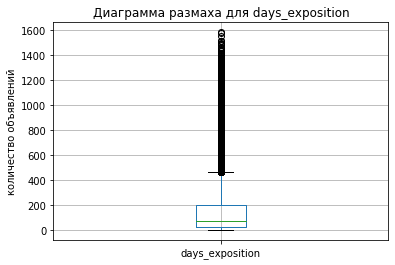

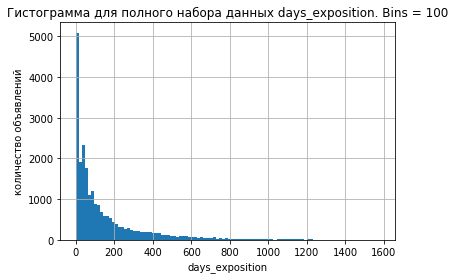

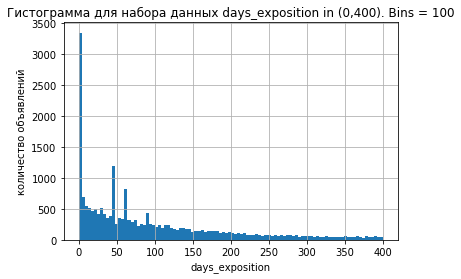

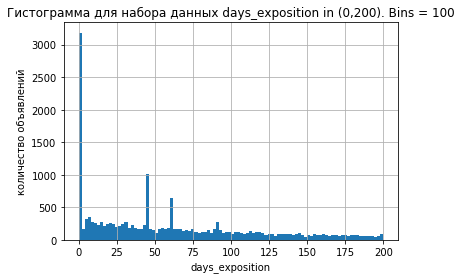

In [6]:
real_estate_data_good_days_expostion = real_estate_data.query('days_exposition > 0')#мы осуществляли замену на нули пропущенных значений. Поэтому, чтобы не было искажения, сделаем выборку
print_statistic_info('days_exposition', 0) #выведем статистическую информацию и диаграмму размаха
print_hist('days_exposition', 100 ,0, 0) #выведем гистограммы
print_hist('days_exposition', 100 ,0, 400)
print_hist('days_exposition', 100 ,0, 200)

#real_estate_data_good_days_expostion.query('days_exposition > 1000').sort_values(by='days_exposition', ascending = False)

# Вывод: анализ количества дней продажи квартиры

    Рассмотрим количество дней продажи квартиры.
На графиках и в описательно статистие хорошр видно, что половина всех квартир продаются в течение 95 дней (медиана), при этом 25% из них - в течение 45 дней. 45 дней - это тот срок, в который происходит самое большое количество продаж. Этот пик сильно выделяется. помимо него есть еще 2 - 60 и 90 дней. Очевидно, эти пики и обусловливают такую большую разницу между средним значением (180.00) и медианой - 95 дней. Далее снижение количества продаж в зависимости от срока размещения объявления относительно плавно снижается. В целом можно видеть, что многие квартиры продаются очень быстро: в целом, чем меньше срок размещения, тем больше продаж. 
Однако некоторые квартиры продаются особенно быстро - даже меньше, чем за неделю. В целом, можно считать, что продажи продолжительностью меньше месяца можно считать очень быстрыми.
75% продаж происходит в течение 232 дней - это почти 7.5 месяцев. Согласно диаграмме размаха, статистически значимыми можно считать только продажи, которые продолжались не более 530 дней. Все остальные продажи можно счиатать необычайно долгими

# Зависимость цены от площади, числа комнат, удаленности от центра

Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.653675  0.363343            -0.206747
total_area             0.653675    1.000000  0.758344            -0.231446
rooms                  0.363343    0.758344  1.000000            -0.184864
cityCenters_nearest   -0.206747   -0.231446 -0.184864             1.000000
Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для датафрейма real_estate_data_shorter_ta : убраны значения с очень большой площадью, для которых заметно сильное рассеяне точек: очевидно, при формировании цены на такие квартиры сильнее влияют другие факторы
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.696502  0.400059            -0.315608
total_area             0.696502    1.000000  0.787873            -0.221631
roo

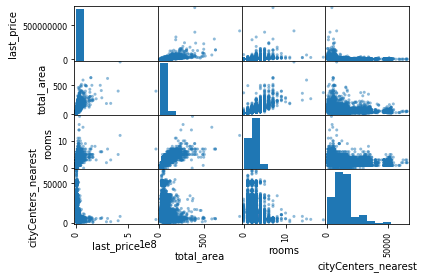

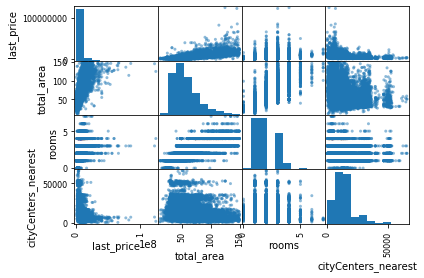

In [7]:
#Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
#Рассмотрим зависимость цены квартиры от площади, числа комнат, удаленности от центра. Для этой цели построим графики корреляции и изучим сами значения корреляции 

#print('Матрица диаграмм рассеяния last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data')
pd.plotting.scatter_matrix(real_estate_data[['last_price','total_area','rooms','cityCenters_nearest']]) #построение матрицы диаграмм рассеяния по данным основной таблицы
print('Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data')
print(real_estate_data[['last_price','total_area','rooms','cityCenters_nearest']].corr()) #таблица корреляции 'last_price','total_area','rooms','cityCenters_nearest' по данным основной таблицы

#значения больше 150 - уже довольно редкие, их можно отбросить для целей дальнейшего анализа
real_estate_data_shorter_ta = real_estate_data.query('total_area < 150')# убираем значения total_area для которых очень сильно рассеяние

#print('Матрица диаграмм рассеяния last_price - total_area - rooms - cityCenters_nearest для датафрейма real_estate_data_shorter_ta : убраны значения с очень большой площадью, для которых заметно сильное рассеяне точек: очевидно, при формировании цены на такие квартиры сильнее влияют другие факторы')
pd.plotting.scatter_matrix(real_estate_data_shorter_ta[['last_price','total_area','rooms','cityCenters_nearest']]) #выводим матрицу диаграмм рассеяния для сокращенной таблицы 
print('Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для датафрейма real_estate_data_shorter_ta : убраны значения с очень большой площадью, для которых заметно сильное рассеяне точек: очевидно, при формировании цены на такие квартиры сильнее влияют другие факторы')
print(real_estate_data_shorter_ta[['last_price','total_area','rooms','cityCenters_nearest']].corr()) #выводим таблицу корреляции для сокращенной таблицы

#print('Матрица диаграмм рассеяния last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data_shorter_ta_good_CityCenters: убраны отсутстующие значения cityCenters_nearest')
real_estate_data_shorter_ta_good_CityCenters = real_estate_data_shorter_ta.query('cityCenters_nearest != "NaN"') #убираем из уже сокращенной таблицы те строки, для которых значение cityCenters_nearest == NaN
#pd.plotting.scatter_matrix(real_estate_data_shorter_ta_good_CityCenters[['last_price','total_area','rooms','cityCenters_nearest']])
print('Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data_shorter_ta_good_CityCenters: убраны отсутстующие значения cityCenters_nearest')
print(real_estate_data_shorter_ta_good_CityCenters[['last_price','total_area','rooms','cityCenters_nearest']].corr()) #выводим таблицу корреляции по данным real_estate_data_shorter_ta_good_CityCenters



# Вывод о зависимости цены от площади, количества комнат, удаленности от центра

Для наглядности представления и более общего анализа данных построим матрицы диаграмм рассеяния и таблицы корреляции в несколько этапов: по данным исходной таблицы real_estate_data, затем уберем из нее строки со слишком большим значенем total_area, затем уберем из таблицы все строки, где cityCenters_nearest == NaN (как мы помним, их довольно много)
    Проанализируем звисимость last_price от total_area, rooms, cityCenters_nearest. Для этого построим матрицу диаграмм рассеяния и таблицу корреляции:
    total_area - last_price: коэффициент корреляции равен 0,66: это средняя положительная корреляция. Посмотрим на график. На графике можно видеть (первая диаграмма), что для меньших значений площади и цены рассеяние меньше: значит, для меньших значений взаимосвязь сильнее, для очень больших значений, наоборот, можно видеть очень большое рассеяние, из чего можно сделать вывод, что для квартир с очень большой площадью при формировании цены бОльшую роль играют другие факторы. Если ограничить площадь квартир значением в 150 кв.м. (вторая диаграмма и вторая таблица корреляции), то можно заметить, что график стал более плотным, а значение коэффициента корреляции приблизилось к сильному
    rooms - last_price: коэффициент корреляции на общих данных равен 0.36: корреляция положительная, но довольно слабая, из чего можно сделать вывод, что количество комнат напрямую несильно влияет на цену, этот параметр больше влияет на площадь, которая влияет на цену: заметна сильная корреляция между rooms и total_area: для большинства стандартных квартир действительно сильна такая взаимосвязь. Конечно, здесь также существуют выбивающиеся значения, нестандартные планировки, либо жилье класса "люкс" где эта связь может работать не так сильно, но все - же. 
    cityCenters_nearest - last_price: заметна слабая отрицательная корреляция. Отрицательная потому, что чем больше расстояние от центра, тем квартиры дешевле (что логично), а вот со "слабостью" можно разобраться, посмотрев на диаграмму рассеяния: для квартир, которые расположены очень далеко от центра, влияние этого параметра действительно слабо: там это уже особо неважно, далеко и далеко. А для квартир, которые расположены очень близко к центру, можно видеть, что влияние этого параметра велико, но оно не единственное. Вообще, судя по графику, связь этих параметров больше похожа не на линейную, а на гиперболическую, отсюда может быть и малое значение коэффициента корреляции
    

# Анализ зависимости цены квртиры от этажа

                        mean     median       min         max  count
floor_type                                                          
другое         103468.219537   98275.86  10368.66  1736842.11  17363
не определено  107360.811928  101806.98  47041.71   198913.04     83
первый          81983.559273   81223.63   9615.38   813253.01   2917
последний       93410.716277   87777.78    111.83  1907500.00   3336

Сводная таблица без значений "не определено"
                 mean    median       min         max  count   percent
floor_type                                                            
другое      103468.22  98275.86  10368.66  1736842.11  17363  0.735222
первый       81983.56  81223.63   9615.38   813253.01   2917  0.123518
последний    93410.72  87777.78    111.83  1907500.00   3336  0.141260



Text(0.5, 0, 'тип этажа')

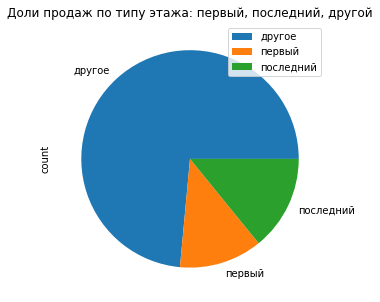

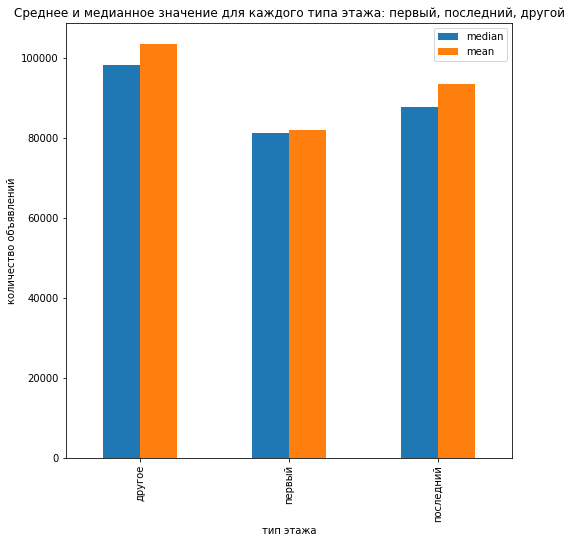

In [8]:
#Изучим зависимость цены квартиры от этажа: первый, последний, другое
real_estate_data_floor_type_pivot = real_estate_data.pivot_table(index = 'floor_type', values = 'm_sq_price', aggfunc = ['mean','median','min','max','count'])#создадим сводную таблицу, в которой для каждого типа этажа 
real_estate_data_floor_type_pivot.columns = ['mean','median','min','max','count'] #переименуем колонки для удобства работы 
print(real_estate_data_floor_type_pivot) #выведем таблицу на экран
real_estate_data_floor_type_pivot = real_estate_data_floor_type_pivot.query('index != "не определено"')#уберем из таблицы те значения, где floor_type = "не определено": они не помогут в поиске ответа на вопрос, а также их довольно мало 
real_estate_data_floor_type_pivot['percent'] = real_estate_data_floor_type_pivot['count'] / real_estate_data_floor_type_pivot['count'].sum()#посчитаем долю каждого типа объявлений
real_estate_data_floor_type_pivot['mean'] = real_estate_data_floor_type_pivot['mean'].round(2) #округляем дл 2 знков после запятой
print()
print('Сводная таблица без значений "не определено"')
print(real_estate_data_floor_type_pivot) #напечатаем обновленную сводную таблицу
print()
pie_plot = real_estate_data_floor_type_pivot.plot.pie(y = 'count', figsize = (5,5)) #рассмотрим наглядно на графике доли всех объявлений
plt.title('Доли продаж по типу этажа: первый, последний, другой')
median_plot = real_estate_data_floor_type_pivot.plot(kind = 'bar',  y=['median','mean'], figsize = (8,8)) 
plt.title('Среднее и медианное значение для каждого типа этажа: первый, последний, другой')
plt.ylabel('количество объявлений')
plt.xlabel('тип этажа')

# Вывод о зависимости цены квартиры от этажа

проанализировав зависимость цены (для анализа брала не параметр last_price, а парамер m_sq_price: цена за квадратный метр - на мой взгляд, это более "чистый" параметр для анализа) от этажа (первый, последний, другое), можно сделать вывод: часть объявлений для этажей типа "другое" (что и логично, если учесть, что их больше, чем первых и последних)
В целом можно сказать, что квартиры на первом этаже - самые дешевые, квартиры на последнем этаже - уже дороже,а цена квартир категории "другое" - самая высокая, что также кажется логичным, потому что люди часто не любят первый и последний этаж

# Анализ зависимости цены от периода размещения объявления

                           mean   median  count   percent
publication_weekday                                      
0 - понедельник      6511613.42  4650000   3612  0.152411
1 - вторник          6394233.42  4730000   4183  0.176505
2 - среда            6627970.43  4700000   3974  0.167686
3 - четверг          6708663.23  4650000   4295  0.181231
4 - пятница          6372130.60  4585000   4000  0.168783
5 - суббота          6976803.94  4555000   1936  0.081691
6 - воскресенье      6246180.30  4550000   1699  0.071691
                         mean   median  count   percent
publication_month                                      
01 - январь        6668233.13  4600000   1500  0.063294
02 - февраль       6468500.11  4650000   2640  0.111397
03 - март          6359275.47  4650000   2587  0.109161
04 - апрель        6737198.47  4800000   2379  0.100384
05 - май           6600435.25  4515000   1274  0.053758
06 - июнь          6310269.40  4400000   1760  0.074265
07 - июль          6649337.49 

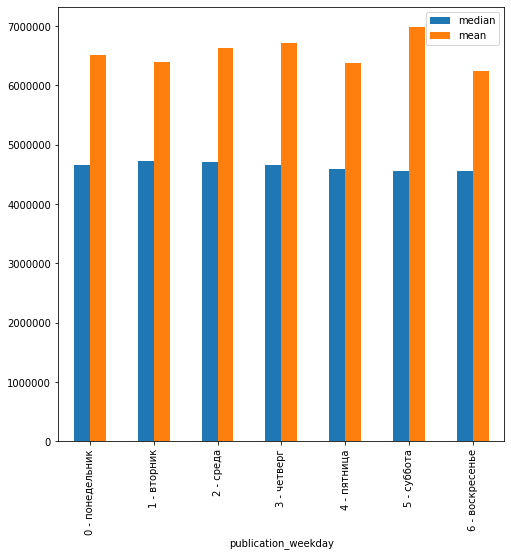

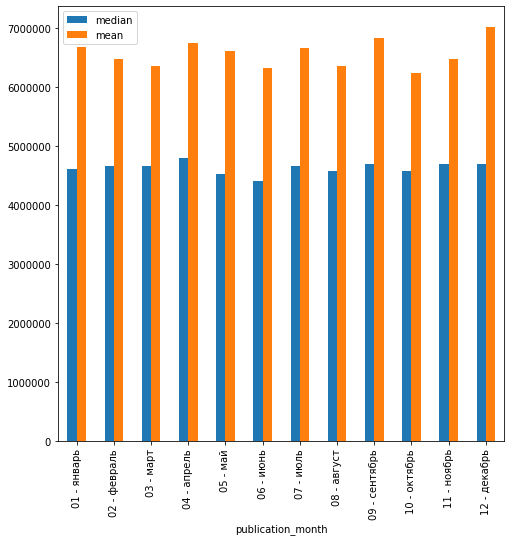

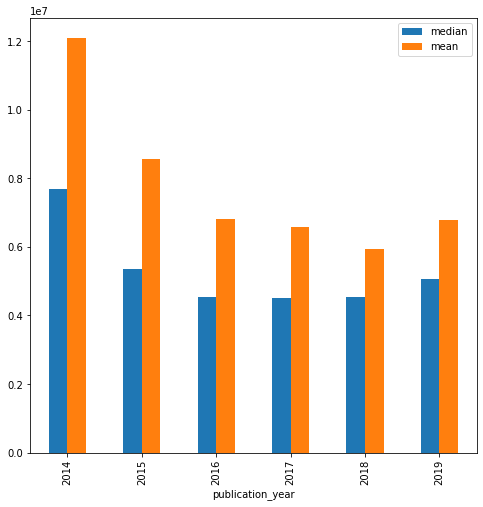

In [9]:
def check_func(var, arr): #функция, проверяющая, есть ли значение в словаре
    if var in arr: #если значение в словаре (в ключе)
        return arr.get(var) #возвращаем значение словаря
    else: #иначе
        return var #возвращаем само занчение
    

def name_weekday_func(wd): #функция для переименования дней недели в понятные нам значения 
    weekday = {0:'0 - понедельник',1:'1 - вторник',2:'2 - среда',3:'3 - четверг',4:'4 - пятница',5:'5 - суббота',6:'6 - воскресенье'} #словарь по дням недели
    return check_func(wd, weekday) #вызываем функцию, проверяющую, есть ли значение в словаре

def name_month_func(wd): #функция для переименования месяцев в понятные нам значения 
    month = {1:'01 - январь', 2:'02 - февраль', 3:'03 - март', 4:'04 - апрель', 5:'05 - май', 6:'06 - июнь', 7:'07 - июль', 8:'08 - август', 9:'09 - сентябрь', 10:'10 - октябрь', 11:'11 - ноябрь', 12:'12 - декабрь'} #словарь для месяцев
    return check_func(wd, month) #вызываем функцию, проверяющую, есть ли значение в словаре
    
def create_pivot_plot(idex_var): #функция для создания сводной таблицы и вывода столбчатой диаграммы 
    real_estate_pivot = real_estate_data.pivot_table(index = idex_var, values = 'last_price', aggfunc = ['mean','median','count'])#создадим сводную таблицу, считаем характеристики цены для кадого заданного параметра
    real_estate_pivot.columns = ['mean','median','count'] #переименовываем столбцы
    real_estate_pivot['mean'] = real_estate_pivot['mean'].round(2) #округляем значения столбцов
    real_estate_pivot['median'] = real_estate_pivot['median'].round(2)
    real_estate_pivot['percent'] = real_estate_pivot['count'] / real_estate_pivot['count'].sum() #считаем долю объявления доля каждого значения заданного параметра
    real_estate_pivot = real_estate_pivot.sort_index() #сортируем по индексу - заданному параметру
    print(real_estate_pivot) #выводим сводную таблицу
    mean_media_plot = real_estate_pivot.plot(kind = 'bar',  y=['median','mean'], figsize = (8,8)) #печатаем столбчатую диаграмму
    return(real_estate_pivot)
    
real_estate_data['publication_weekday'] = real_estate_data['publication_weekday'].apply(name_weekday_func) #переименуем дни недели в более понятные для нас значения
real_estate_data['publication_month'] = real_estate_data['publication_month'].apply(name_month_func) #переименуем месяцы в более понятные для нас значения

real_estate_data_weekday_pivot = create_pivot_plot('publication_weekday') #вызываем функцию для создания сводной таблицы и столбчатой диаграммы зависимости цены от дня недели публикации
real_estate_data_month_pivot = create_pivot_plot('publication_month') #вызываем функцию для создания сводной таблицы и столбчатой диаграммы зависимости цены от месяца публикации
real_estate_data_year_pivot = create_pivot_plot('publication_year') #вызываем функцию для создания сводной таблицы и столбчатой диаграммы зависимости цены от года публикации


# Вывод о зависимости цены от периода размещения

На сводной таблице и графике хорошо видно, что от дня недели довольно сильно зависит количество размещаемых объявлений: в выходные дни их размещают значительно меньше, чем в будние, а в будние дни их количество примерно одинаково в течение рабочей недели (чуть выше только в четверг). Если же говорить о распределении цены на квартиры, то даже на столбчатой даиграмме видно, сто распределение медианной цены практически равномерное (тольк в выходные дни и пятницу немного (незначительно) ниже). Значения средней цены тоже не очень сильно отличается по дням недели: только в субботу чуть заметнее подъем. Возможо, было просто размещено несколько объявлений для квартир с высокой стоимостью и площадью
При распределении цен на недвижимость по месяцам картина выглядит немного иначе: медианная цена распределена относительно равномерно. Наблюдается только достаточно заметный подъем в апреле, затем заметное снижение в мае-июне. Возможно, это связано с тем, что в апреле можно выгоднее продать загородную недвижимость, чем в мае и июне, когда сезон уже начался, и поэтому цена немного падает. А именно в это время может быть очень много объявлений о продаже загородной недвижимости. При этом средняя цена скачет: в январе пик, затем февраль-март падение, потом снова в апреле пик (привет, загородная недвижимость), май-июнь - падение, в июле - снова пик,в августе - падение, в сентябре - подъем, резкое падение в октябре и подъем с ноября. Полагаю, что эти пики и падения могут быть связны с ростом спроса на загородную недвижимость (как в апреле и сентябре (в сентябре может действовать от психологический фактор на покупателя, что многие думают, что по завершении дачного сезона цены падают, так что кто-то особо предприимчивый может и поднять цену, либо просто было выставлено больше объявлений большей площади), например), либо тот факт, что зимой люди могут охотнее тратить деньги на недвижимость, чем летом (отпусков меньше), либо, наоборот, в общей "лихорадке" новогодних праздников
Если говорить о распределении цен на недвижимость по годам, то можно заметить падениие цен в период 2014-2018 года, а в 2019 году снова начинается подъем. Хотя при этом, если посмотреть (в таблице) на долю объявления по годам, то можно видеть рост этой самой доли в 2014-2018 годах, и снижение в 2019, что соответствует базовым законам рыночной экономики: выше предложение - ниже цена, ниже предложение - выше цена, ну а также очевидна связь с ситуацией по курсу доллара в начале и в концее 2014 года и после: рост практически в 2 раза и потом еще выше. Безусловно, это оказало свое влияние на рынок недвижимости и цены там. 

# Зависимость цены от района продажи недвижимости для 10 самых популярных районов

,count,mean
locality_name,,
санкт-петербург,15721,114849.008793
поселок мурино,556,85681.762572
поселок шушары,440,78677.364318
всеволожск,398,68654.473970
пушкин,369,103125.819377
колпино,338,75424.579112
поселок парголово,327,90175.913089
гатчина,307,68746.146515
деревня кудрово,299,92473.547559


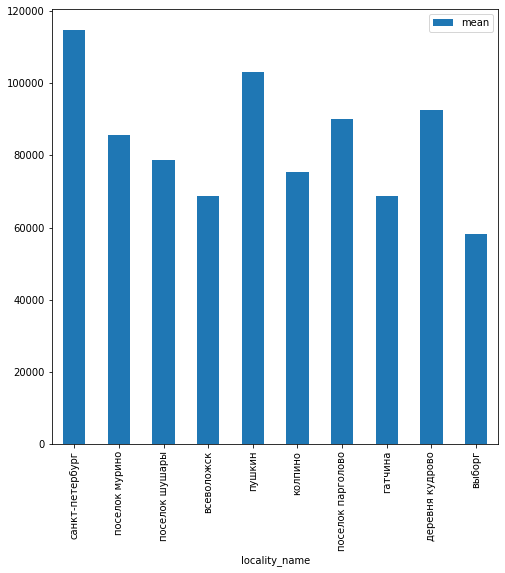

In [10]:
real_estate_most_popular_locality_name = real_estate_data.pivot_table(index = 'locality_name', values = 'm_sq_price', aggfunc = ['count','mean']) #создадим сводную таблицу, в которой подсчитаем количество объявления для всех населенных пунктов и средню цену за квадратный метр в них
real_estate_most_popular_locality_name.columns = ['count','mean'] #переименуем столбцы
real_estate_most_popular_locality_name = real_estate_most_popular_locality_name.sort_values(by = 'count', ascending = False).head(10) #отсртируем по убыванию по количеству объявлений для каждого населенного пункта и выберем 10 самых популярных
real_estate_most_popular_locality_plot = real_estate_most_popular_locality_name.plot(kind = 'bar',  y='mean', figsize = (8,8)) #нарисуем столбчатую диаграмму
real_estate_most_popular_locality_name #выведем саму сводную таблицу

# Вывод о зависимости цены от района продажи для 10 самых популярных районов

На диаграмме видно, что среди населенных пунктов с самым большим количеством объявлений, самая высокая стоимость жилья - в Санкт - Петербурге, чуть ниже в Пушкине и Кудрово. Самая низкая стоимость жилья в Выборге, чуть выше во Всеволжске и Гатчине.

# Определение областей, входящих в центр города

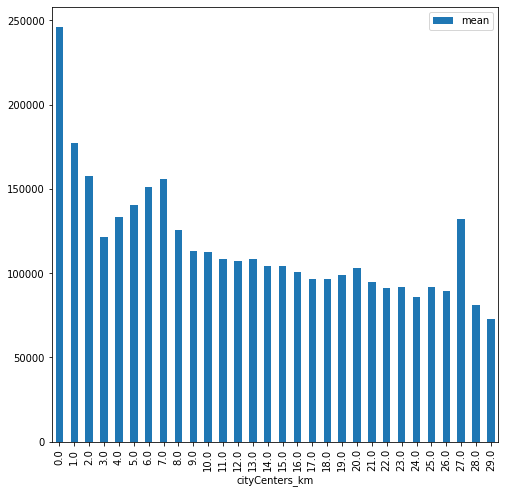

In [11]:
warnings.filterwarnings('ignore')
real_estate_spb = real_estate_data.query('locality_name == "санкт-петербург" and cityCenters_nearest != "NaN"') #выберем только строки с объявлениями для Санкт-Петербурга, где указано расстояние до центра
real_estate_spb['cityCenters_km'] = real_estate_spb['cityCenters_nearest'] / 1000 #посчитаем расстояние до центра в километрах
real_estate_spb['cityCenters_km'] = real_estate_spb['cityCenters_km'].round(0) #округлим расстояние до центра в километрах до целого значения
real_estate_spb_pivot_km = real_estate_spb.pivot_table(index = 'cityCenters_km', values = 'm_sq_price', aggfunc = 'mean') #для каждого расстояния до центра в километрах посчитаем среднюю цену за квадратный метр
real_estate_spb_pivot_km.columns = ['mean'] #переименуем столбцф
real_estate_spb_pivot_km['mean'] = real_estate_spb_pivot_km['mean'].round(2)#округлим значение среднего до 2 знаков после запятой
real_estate_spb_pivot_km_plot = real_estate_spb_pivot_km.plot(kind = 'bar', y='mean', figsize = (8,8)) #нарисуем столбчатую диаграмму
#real_estate_spb_pivot_km #выведем сводную таблицу

# Вывод об определении областей, входящих в центр

На графике видно, что после 7 км начинается общая тенденция к снижению цены: так и должно быть, потому что цена всегда снижается при удалении от центра. Таким образом, обозначим центральную зону как зону в 7 км. 

#  Анализ данных для квартир в центре

Аналитика по total_area

count    3525.000000
mean       93.168641
std        59.473561
min        12.000000
25%        57.000000
50%        78.700000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64
Количество различных значений в total_area: 1159


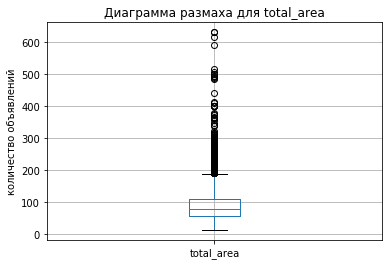

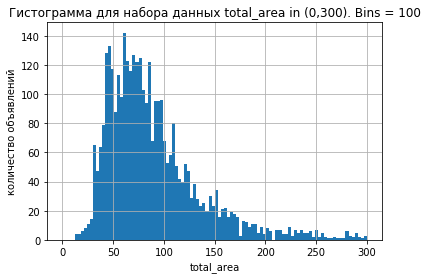


Аналитика по last_price

count    3.525000e+03
mean     1.489553e+07
std      2.432091e+07
min      1.600000e+06
25%      6.690000e+06
50%      9.200000e+06
75%      1.450000e+07
max      7.630000e+08
Name: last_price, dtype: float64
Количество различных значений в last_price: 1130


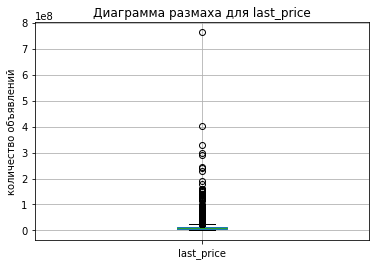

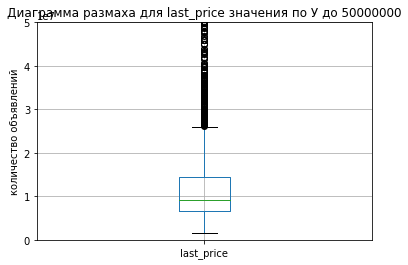

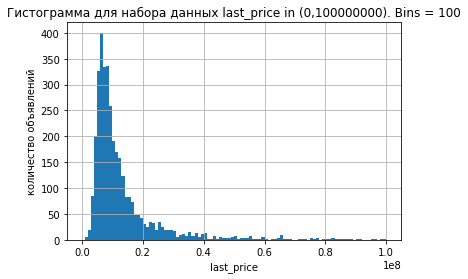


Аналитика по rooms

count    3525.000000
mean        2.834326
std         1.449808
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64
Количество различных значений в rooms: 16


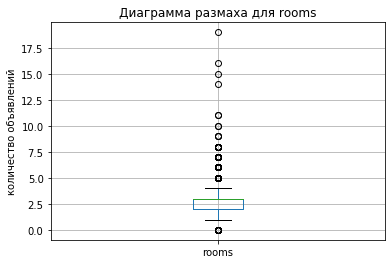

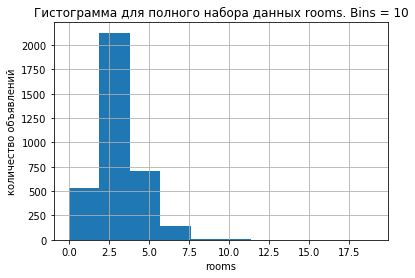

count    2221.000000
mean        3.060527
std         0.313355
min         2.400000
25%         2.800000
50%         3.000000
75%         3.250000
max         3.980000
Name: ceiling_height, dtype: float64
Гистограммы для real_estate_spb_center_correct_ceiling_height: высота потолков


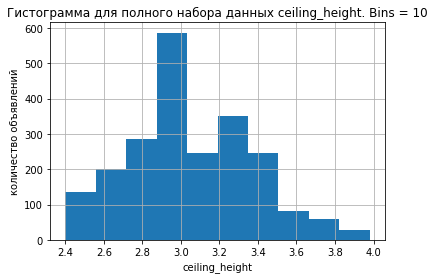

Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data
                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.613480  0.314874            -0.042186
total_area             0.613480    1.000000  0.730397            -0.093031
rooms                  0.314874    0.730397  1.000000            -0.170847
cityCenters_nearest   -0.042186   -0.093031 -0.170847             1.000000

Сводная таблица для floor_type



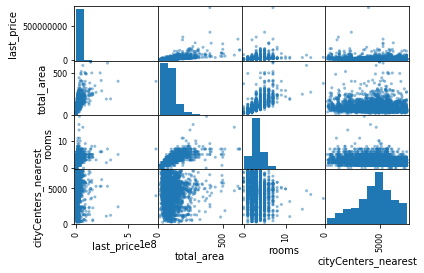

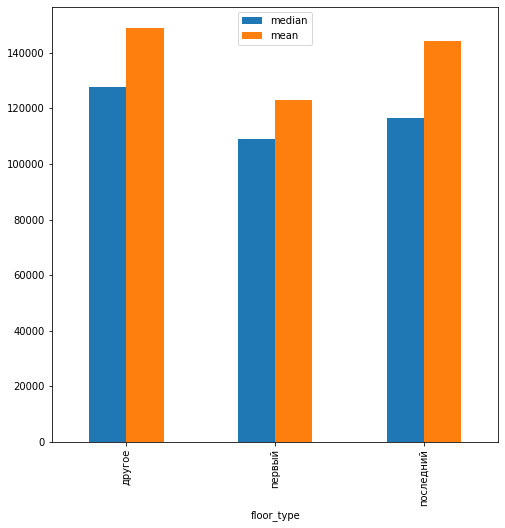

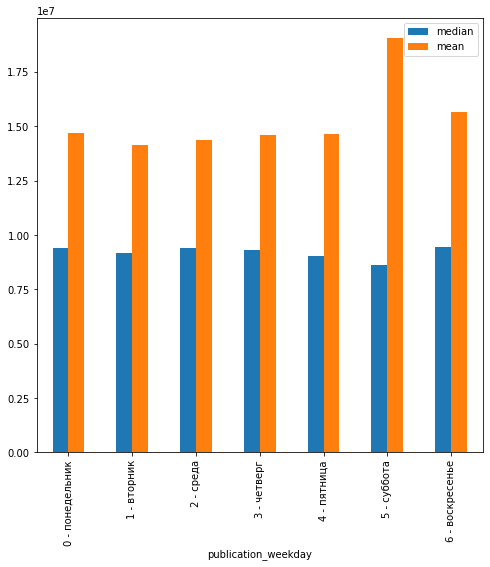

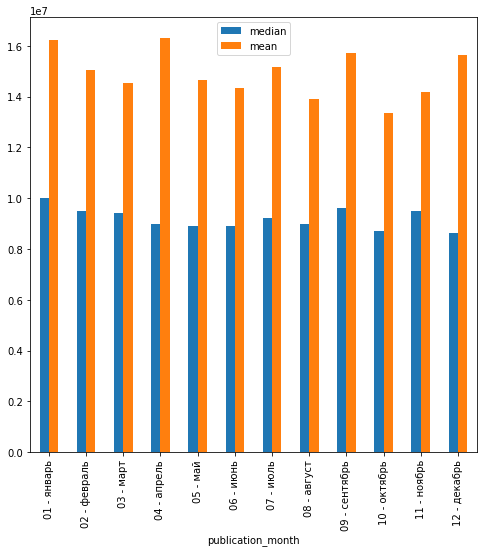

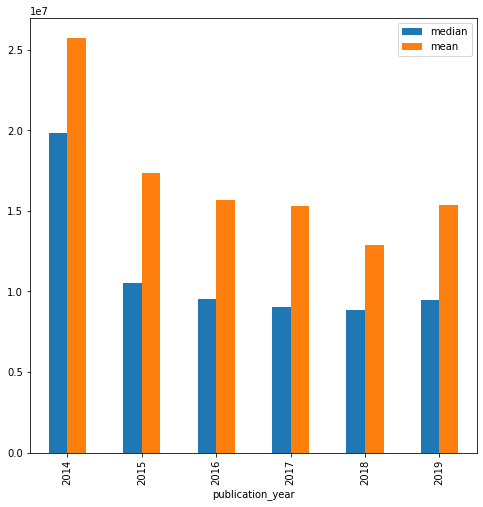

In [12]:
def create_pivot_spb_center_plot(idex_var): #функция для создания сводной таблицы и вывода столбчатой диаграммы 
    real_estate_pivot = real_estate_spb_center.pivot_table(index = idex_var, values = 'last_price', aggfunc = ['mean','median','count'])#создадим сводную таблицу, считаем характеристики цены для кадого заданного параметра
    real_estate_pivot.columns = ['mean','median','count'] #переименовываем столбцы
    real_estate_pivot['mean'] = real_estate_pivot['mean'].round(2) #округляем значения столбцов
    real_estate_pivot['median'] = real_estate_pivot['median'].round(2)
    real_estate_pivot['percent'] = real_estate_pivot['count'] / real_estate_pivot['count'].sum() #считаем долю объявления доля каждого значения заданного параметра
    real_estate_pivot = real_estate_pivot.sort_index() #сортируем по индексу - заданному параметру
    #print(real_estate_pivot) #выводим сводную таблицу
    mean_media_plot = real_estate_pivot.plot(kind = 'bar',  y=['median','mean'], figsize = (8,8)) #печатаем столбчатую диаграмму
    return(real_estate_pivot)

def print_statistic_info_spb(column_name,lim_big_diagram): #функция печати статистической информациии диаграмм размаха
    print(real_estate_spb_center[column_name].describe()) #выведем значения описательной статистики 
    print('Количество различных значений в '+column_name+': {}'.format(len(real_estate_spb_center[column_name].unique()))) #посчитаем количество уникальных значений в столбце, чтобы лучше расчитать количество корзин для гистограммы
    real_estate_spb_center.boxplot(column = column_name) #выводим диаграмму размаха
    plt.title('Диаграмма размаха для '+ column_name) #печать заголовка диаграммы
    plt.ylabel('количество объявлений') #именование оси Y
    plt.show() 
    if lim_big_diagram > 0: #если масштаб нужно изменить, печатаем диаграмму в новом масштабе
        real_estate_spb_center.boxplot(column = column_name)
        plt.title('Диаграмма размаха для '+ column_name + ' значения по У до {}'.format(lim_big_diagram))
        plt.ylim(0,lim_big_diagram)
        plt.ylabel('количество объявлений')
        plt.show()
    


def print_hist_spb(column_name, bins_number ,range_lower, range_higher): #функция печати гистограммы
    try:
        if  range_higher == 0: #если не заданы границы диапазона
            hist_1 = real_estate_spb_center[column_name].hist(bins = bins_number) #постороим смую общую гистограмму 
            plt.title('Гистограмма для полного набора данных ' + column_name + '. Bins = {}'.format(bins_number)) #заголовок диаграммы
        else: #если границы диапазона задны
            hist_1 = real_estate_spb_center[column_name].hist(bins = bins_number, range = (range_lower, range_higher)) #постороим смую общую гистограмму
            plt.title('Гистограмма для набора данных ' + column_name + ' in ({},{}). Bins = {}'.format(range_lower, range_higher,bins_number))
        plt.xlabel(column_name) #именование оси X
        plt.ylabel('количество объявлений') #именование оси Y
        plt.show()
   
    except:
        print('Что-то пошло не так')


real_estate_spb_center = real_estate_spb.query('cityCenters_km <= 7') #выдляем квартиры в центре
# Рассмотрим основные параметры: площадь, цена,число комнат, высота потолков. Построим гистограммы для каждого
print('Аналитика по total_area')
print()
print_statistic_info_spb('total_area', 0) #выводим общую статистическую информацию
print_hist_spb('total_area', 100 ,0, 300)#строим гисторграммы

print()
print('Аналитика по last_price')
print()
print_statistic_info_spb('last_price', 50000000)
print_hist_spb('last_price', 100 ,0, 100000000)#строим гисторграммы

print()
print('Аналитика по rooms')
print()
print_statistic_info_spb('rooms', 0)
print_hist_spb('rooms', 10 ,0, 0)#строим гисторграммы




real_estate_spb_center_correct_ceiling_height = real_estate_spb_center.query('index in @real_estate_data_good_ceiling_height.index')#dвыделяем квартиры с правдобподобной высотой потолков
print(real_estate_spb_center_correct_ceiling_height['ceiling_height'].describe())

print('Гистограммы для real_estate_spb_center_correct_ceiling_height: высота потолков')#Выведем гистограммы для total_area
real_estate_spb_center_correct_ceiling_height['ceiling_height'].hist(bins = 10) #постороим смую общую гистограмму
plt.title('Гистограмма для полного набора данных ceiling_height. Bins = 10')
plt.xlabel('ceiling_height') #именование оси X
plt.ylabel('количество объявлений')
plt.show()

pd.plotting.scatter_matrix(real_estate_spb_center[['last_price','total_area','rooms','cityCenters_nearest']]) #построение матрицы диаграмм рассеяния по данным основной таблицы
print('Таблица корреляции last_price - total_area - rooms - cityCenters_nearest для полного датафрейма real_estate_data')
print(real_estate_spb_center[['last_price','total_area','rooms','cityCenters_nearest']].corr()) 

real_estate_spb_center_floor_type_pivot = real_estate_spb_center.pivot_table(index = 'floor_type', values = 'm_sq_price', aggfunc = ['mean','median'])#создадим сводную таблицу, в которой для каждого типа этажа 
real_estate_spb_center_floor_type_pivot.columns = ['mean','median'] #переименуем колонки для удобства работы 
real_estate_spb_center_floor_type_pivot = real_estate_spb_center_floor_type_pivot.query('index != "не определено"')#уберем из таблицы те значения, где floor_type = "не определено": они не помогут в поиске ответа на вопрос, а также их довольно мало 
real_estate_spb_center_floor_type_pivot['mean'] = real_estate_spb_center_floor_type_pivot['mean'].round(2) #округляем дл 2 знков после запятой
print()
print('Сводная таблица для floor_type')
#print(real_estate_spb_center_floor_type_pivot) #напечатаем обновленную сводную таблицу
print()
median_spb_floor_plot = real_estate_spb_center_floor_type_pivot.plot(kind = 'bar',  y=['median','mean'], figsize = (8,8))

real_estate_spb_data_weekday_pivot = create_pivot_spb_center_plot('publication_weekday') #вызываем функцию для создания сводной таблицы и столбчатой диаграммы зависимости цены от дня недели публикации
real_estate_spb_data_month_pivot = create_pivot_spb_center_plot('publication_month') #вызываем функцию для создания сводной таблицы и столбчатой диаграммы зависимости цены от месяца публикации
real_estate_spb_data_year_pivot = create_pivot_spb_center_plot('publication_year') #вызываем функцию для создания сводной таблицы и столбчатой диаграммы зависимости цены от года публикации


Для квартир в центре можно выделить некоторые отличительные особенности: в целом, площадь квартир здесь выше, чем в общей выборке (это справедливо как для среднего, так и для медианного значения), однако, сюда же и попадают квартиры с самой маленькой площадью, но при этом здесь довольно много очень больших квартир (сыше 200 м.кв, максимальная площадь - 631.2 кв.м., однако, согласно диаграмме размаха, они в статистически значимую выборку не входят)<br>
Цена в центре также превышает цену в общем по выборке. Среднее значение для квартир в центре - 14 млн, а в общем - 6.5 млн., медиана - 9.2 млн, против 4,6 млн по общей выборке. В центре много более дорогих квартир, и влияние прочих факторов (площадь, например, или количество комнат) должно быть снижено, хотя, как мы можем видеть на диаграммах для общей площади и количества комнат - эти показатели здесь тоже выше.<br>
В центре большинство квартир - 2-3 комнатные, тогда как в основнйо выборке -0-1-2 комнатные. 
Потолки в центре также выше: по большей части -2.9-3 м, тогда как по общей выборке - 2.4 - 2.8 метра
коэффициенты корреляции для квартир в центре несколько ниже, чем по общей выборке:<br>
цена уже намного меньше зависит от общей площади (0.61 против 0.67): здесь играет большую роль уже сама престижность центрального района, а также, возможно, класс жилья. От количества комнат зависимость также еще меньше, хотя также высок коэффициент корреляции между колчеством комнат и общей  площадью: видно опосредованное влияние
Отрицательный коэффициент корреляции между ценой и удаленностью от центра еще ниже: здесь уже не так важно, насколько именно удалена квартира от центральной точки: она все равно в центре.<br>
Общая зависимость цены от типа этажа такая же, как и для общей выборки: ниже всего цена для первого этажа, самая высокая - для других (ни первых, ни последних)<br>
Цена на недвижимость в центре в зависимости от года размещения подчиняется тем же законам, что и для общей выборки: снижение вплоть до 2018 года, в 2019 году - рост.<br>
Также как и для общей выборки, заметен рост цен в апреле, январе и декабре, а также в сентябре. Это говрит о том, что в течение года благоприятные периоды в целом схожи<br>
Для общей выборки зависимость цены от дня недели размещения более ровная, здесь же очевиден "скачок" средней цены в субботу: очевидно, это наиболее удобное время для размещения более дорогих объявлений (возможно, потому что на них нужно больше времени: больше фотографий, больше информации)

### Шаг 5. Общий вывод

Проанализировав общие данные, можно сделать следующие выводы:
1. в данных есть явные ошибки и некорректные значения, о чем необходимо сообщить в отдел разработки
2.Такие данные, как площадь квартир, цена, высота потолков и количество комнат имеют достаточно большой разброс для всей выборки, однако для квартир в центре этти данные являются более "дорогими": значительно выше средняя и медианная цена, площадь квартир (хотя и очень маленькие здесь тоже есть), высота потолков и даже количество комнат. Жилье здесь является более элитным по многим параметрам. Однако цена здесь определяется уже под меньшим влиянием факторов, важных для общей выборки: общая лощадь, количество комнат, удаленность от центра
3. Между ценой и общей площадью заметна заметна средняя корреляция, однако, если убрать очень сильно выбивающиеся значения, она усиливается, но ненамного, что говорит о том, что это не единственный важный фактор. На общей выборке влияние маленького отрицательного коэффициента корреляции объясняется скорее тем, что связь там выглядит не линейной, а больше похожа на гиперболическую.
4. Покупатели готовы платить больше, если квартира находится ни на первом, ни на последнем этаже. Если квартира находится на первом этаже, покупатели готовы платить меньше всего
5. Заметно влияние экономической ситуации на цены на недвижимость: с 2014 по 2018 вклчительно цены на жилье заметно падали, в 2019 году снова начался рост цен. 
    В апреле, а также декабре, феврале и августе-сентябре также наблюдается рост цен на недвижимость. Причем это актуально как для общей выборки, так и для квартир в центре Санкт-Петербуга
6. Среди населенных пунктов с самым большим количеством насления наиболее высокие цены на недвижимость в Санкт-Петербурге, Пушкине и деревне Кудрово, самые низкие - в Гатчине, Всеволжске и Выборге: то есть, чем ближе к центру, тем выше стоимость квартир

Таким образом, можно говорить о следующих параметрах, влияющих на формирование рыночной стоимости: 
1. Общая площадь квартиры. Как мы помним, для статистически значимой выборки коэффициент корреляции близок к высокому. Соответственно, если квартира относится к статистически значимой выборке (до 110-120 кв.м, думаю, можно даже округлить до 150), всегда можно приблизительно предположить цену, умножив площадь на коэффициент корреляции (0,696), однако не стоит забывать о влиянии других факторов, которые могут дать дополнительную наценку.
Общая площадь квартиры и количество комнат - взаимосвязанные параметры. Прямое влияние количества комнат на цену довольно низкое, поэтому не вижу смысла выделять этот параметр в качестве отдельного, по крайней мере, для жилья, не относящегося к элитному
2. Также понятно и очевидно, что на цену квартиры очень сильно влияет факт ее удаленности от центра, однако звисимость здесь нелинейная. Полагаю, оптимально будет выделить разные зоны удаленности от центра и для каждой зоны просчитать свой коэффициент влияния
3. Обязательно необходимо учитывать сезонные всплески цен: апрель, сентябрь, декабрь. Думаю, здесь также можно выделить некоторый коэффициент влияния и использовать его. Также всегда стоит следить за общей тенденцией по изменению цен на квартиры по годам и в зависимости от экономической (и политической) ситуации. Здесь не всегда можно использовать прогнозные коэффициенты (рассчитанные далеко не только на статистической информации прошлых лет), хотя бы потому, что слишком много факторов влияют на ценообразование недвижимости. Мы видели рост цены в 2019 году по сравнению с 2018, и могли посчитать некоторый прогнозный коэффициент роста в 2020 году, но ведь никто не ждал короновируса, который определенно внес свою лепту
4. Также очень бы хотелось предотвращать заранее попадание в базу заведомо некорректных данных. К примеру, даже на этапе ввода можно проверять некоторые значения, например, высоту потолков. Для чего давать пользователю возможность ввести высоту потолка 27 метров в многоэтажном доме? Также было бы замечательно сделать обязательными для заполнения поля об общей этажности здания, жилой площади квартиры, площади кухни. Эти данные всегда очень нужны и покупателям, и аналитикам. 
